In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.5f}'.format
%matplotlib inline
#sns.set(style='whitegrid', palette='muted', font_scale=1.5)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-data/housingData_7R.xlsx


In [3]:
#pd.set_option('display.max_rows', 20)

In [4]:
!pip install openpyxl

     |████████████████████████████████| 242 kB 531 kB/s            


In [5]:
data = pd.read_excel("/kaggle/input/housing-data/housingData_7R.xlsx")

In [6]:
df = data.copy()

In [7]:
#data = df.copy()

In [8]:
data.head()

,Unnamed: 0,adID,adDealType,adCanton,adZipCode,adCity,adPublishedDate,adAvailableDate,adPriceText,adDescription,adLangDetected,adNumRooms,adFloor,adYearOfConstruction,adNumApartments,adFloor.1,adNumApartments.1,adLivingSpace,adBuildingArea,adUsefulArea,adCoordE,adCoordN
0,0,A1,10,JU,2954.00000,Asuel,2020-12-16,not available,"CHF 1,050",Appartement avec beaucoup de charme à louer à ...,fr,3.5,not available,not available,NaN,not available,NaN,80,NaN,NaN,7.21142,47.40130
1,1,A10,10,ZH,8053.00000,Zürich,2020-11-19,nach Vereinbarung,"CHF 4,048",Die Highlights:<br />» Gut geschnittener Büror...,de,None,EG,1992,NaN,EG,NaN,not available,NaN,145,8.58706,47.35843
2,2,A100,10,ZH,8902.00000,Urdorf,2021-01-20,sofort,"CHF 1,061",Für diese Wohnung suchen wir ein nettes Paar (...,de,3,3. Stock,not available,NaN,3. Stock,NaN,57,NaN,NaN,8.43089,47.37906
3,3,A10000,10,TI,6830.00000,Chiasso,2020-10-16,sofort,"CHF 2,250",<h3>Chiasso</h3><p><p>Si affitta in pieno a ce...,it,10,2. Stock,not available,NaN,2. Stock,NaN,190,NaN,NaN,9.03179,45.83595
4,4,A100001,20,TI,6818.00000,Melano,2020-07-17,sofort,"CHF 2,150,000","Attico mansardato, posto in elegante palazzina...",it,5.5,3. Stock,2012,NaN,3. Stock,NaN,163,NaN,388,8.98268,45.92414


In [9]:
data.shape

(582669, 22)

In [10]:
data.columns

Index(['Unnamed: 0', 'adID', 'adDealType', 'adCanton', 'adZipCode', 'adCity',
       'adPublishedDate', 'adAvailableDate', 'adPriceText', 'adDescription',
       'adLangDetected', 'adNumRooms', 'adFloor', 'adYearOfConstruction',
       'adNumApartments', 'adFloor.1', 'adNumApartments.1', 'adLivingSpace',
       'adBuildingArea', 'adUsefulArea', 'adCoordE', 'adCoordN'],
      dtype='object')

In [11]:
data = data.drop('Unnamed: 0', axis = 1)

In [12]:
data.describe(include = "all")

,adID,adDealType,adCanton,adZipCode,adCity,adPublishedDate,adAvailableDate,adPriceText,adDescription,adLangDetected,adNumRooms,adFloor,adYearOfConstruction,adNumApartments,adFloor.1,adNumApartments.1,adLivingSpace,adBuildingArea,adUsefulArea,adCoordE,adCoordN
count,582669,582669.00000,582669,582668.00000,535442,582669,582669,582669,582646,582669,582669,582669,582669,19549.00000,582669,19549.00000,582669,57224,105643,582669.00000,582669.00000
unique,582669,NaN,7,NaN,2148,2135,700,9147,441161,4,100,56,520,NaN,56,NaN,1363,3602,1643,NaN,NaN
top,A1,NaN,ZH,NaN,Zürich,2021-08-13,nach Vereinbarung,On request,None,de,None,not available,not available,NaN,not available,NaN,not available,"1,000",100,NaN,NaN
freq,1,NaN,144098,NaN,36322,10281,234256,27155,15619,295370,109048,273739,369297,NaN,273739,NaN,201091,658,2203,NaN,NaN
mean,NaN,12.78479,NaN,4782.51585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.22155,NaN,9.22155,NaN,NaN,NaN,7.84939,46.80437
std,NaN,4.48251,NaN,2821.55953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.42858,NaN,12.42858,NaN,NaN,NaN,2.58816,0.67508
min,NaN,10.00000,NaN,1000.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,1.00000,NaN,NaN,NaN,0.00000,-141.54182
25%,NaN,10.00000,NaN,1800.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00000,NaN,2.00000,NaN,NaN,NaN,7.05056,46.46260
50%,NaN,10.00000,NaN,4950.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00000,NaN,6.00000,NaN,NaN,NaN,7.95761,46.83534
75%,NaN,20.00000,NaN,6987.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.00000,NaN,12.00000,NaN,NaN,NaN,8.65123,47.26299


In [13]:
data['adDescription'].head()

0    Appartement avec beaucoup de charme à louer à ...
1    Die Highlights:<br />» Gut geschnittener Büror...
2    Für diese Wohnung suchen wir ein nettes Paar (...
3    <h3>Chiasso</h3><p><p>Si affitta in pieno a ce...
4    Attico mansardato, posto in elegante palazzina...
Name: adDescription, dtype: object

In [14]:
data['adDealType'].value_counts()

10    420408
20    162261
Name: adDealType, dtype: int64

In [15]:
data['Deal_Type'] = data['adDealType'].copy()

In [16]:
target_map = {
    10: 'rental',
    20: 'sell'}

data.Deal_Type.replace(target_map, inplace = True)

In [17]:
data['Deal_Type'].head()

0    rental
1    rental
2    rental
3    rental
4      sell
Name: Deal_Type, dtype: object

In [18]:
data.columns

Index(['adID', 'adDealType', 'adCanton', 'adZipCode', 'adCity',
       'adPublishedDate', 'adAvailableDate', 'adPriceText', 'adDescription',
       'adLangDetected', 'adNumRooms', 'adFloor', 'adYearOfConstruction',
       'adNumApartments', 'adFloor.1', 'adNumApartments.1', 'adLivingSpace',
       'adBuildingArea', 'adUsefulArea', 'adCoordE', 'adCoordN', 'Deal_Type'],
      dtype='object')

In [19]:
len(data.columns)

22

In [20]:
original_col = data.columns

new_col = ['ID', 'DealType', 'Canton', 'ZipCode',
           'City','PublishedDate', 'AvailableDate', 'PriceText', 
           'Description', 'LangDetected', 'NumRooms', 'Floor', 
           'YearOfConstruction', 'NumApartments', 'Floor1', 
           'NumApartments1', 'LivingSpace', 'BuildingArea', 
           'UsefulArea', 'CoordE', 'CoordN' ,'Deal_Type']

data = data.rename(columns=dict(zip(original_col,new_col)))

data.head()

,ID,DealType,Canton,ZipCode,City,PublishedDate,AvailableDate,PriceText,Description,LangDetected,NumRooms,Floor,YearOfConstruction,NumApartments,Floor1,NumApartments1,LivingSpace,BuildingArea,UsefulArea,CoordE,CoordN,Deal_Type
0,A1,10,JU,2954.00000,Asuel,2020-12-16,not available,"CHF 1,050",Appartement avec beaucoup de charme à louer à ...,fr,3.5,not available,not available,NaN,not available,NaN,80,NaN,NaN,7.21142,47.40130,rental
1,A10,10,ZH,8053.00000,Zürich,2020-11-19,nach Vereinbarung,"CHF 4,048",Die Highlights:<br />» Gut geschnittener Büror...,de,None,EG,1992,NaN,EG,NaN,not available,NaN,145,8.58706,47.35843,rental
2,A100,10,ZH,8902.00000,Urdorf,2021-01-20,sofort,"CHF 1,061",Für diese Wohnung suchen wir ein nettes Paar (...,de,3,3. Stock,not available,NaN,3. Stock,NaN,57,NaN,NaN,8.43089,47.37906,rental
3,A10000,10,TI,6830.00000,Chiasso,2020-10-16,sofort,"CHF 2,250",<h3>Chiasso</h3><p><p>Si affitta in pieno a ce...,it,10,2. Stock,not available,NaN,2. Stock,NaN,190,NaN,NaN,9.03179,45.83595,rental
4,A100001,20,TI,6818.00000,Melano,2020-07-17,sofort,"CHF 2,150,000","Attico mansardato, posto in elegante palazzina...",it,5.5,3. Stock,2012,NaN,3. Stock,NaN,163,NaN,388,8.98268,45.92414,sell


In [21]:
# replace all column names (in place)
#new_cols = [‘column_x’, ‘column_y’, ‘column_z’]
#df.columns = new_cols

## EDA

In [22]:
data.head()

,ID,DealType,Canton,ZipCode,City,PublishedDate,AvailableDate,PriceText,Description,LangDetected,NumRooms,Floor,YearOfConstruction,NumApartments,Floor1,NumApartments1,LivingSpace,BuildingArea,UsefulArea,CoordE,CoordN,Deal_Type
0,A1,10,JU,2954.00000,Asuel,2020-12-16,not available,"CHF 1,050",Appartement avec beaucoup de charme à louer à ...,fr,3.5,not available,not available,NaN,not available,NaN,80,NaN,NaN,7.21142,47.40130,rental
1,A10,10,ZH,8053.00000,Zürich,2020-11-19,nach Vereinbarung,"CHF 4,048",Die Highlights:<br />» Gut geschnittener Büror...,de,None,EG,1992,NaN,EG,NaN,not available,NaN,145,8.58706,47.35843,rental
2,A100,10,ZH,8902.00000,Urdorf,2021-01-20,sofort,"CHF 1,061",Für diese Wohnung suchen wir ein nettes Paar (...,de,3,3. Stock,not available,NaN,3. Stock,NaN,57,NaN,NaN,8.43089,47.37906,rental
3,A10000,10,TI,6830.00000,Chiasso,2020-10-16,sofort,"CHF 2,250",<h3>Chiasso</h3><p><p>Si affitta in pieno a ce...,it,10,2. Stock,not available,NaN,2. Stock,NaN,190,NaN,NaN,9.03179,45.83595,rental
4,A100001,20,TI,6818.00000,Melano,2020-07-17,sofort,"CHF 2,150,000","Attico mansardato, posto in elegante palazzina...",it,5.5,3. Stock,2012,NaN,3. Stock,NaN,163,NaN,388,8.98268,45.92414,sell


In [23]:
data.columns

Index(['ID', 'DealType', 'Canton', 'ZipCode', 'City', 'PublishedDate',
       'AvailableDate', 'PriceText', 'Description', 'LangDetected', 'NumRooms',
       'Floor', 'YearOfConstruction', 'NumApartments', 'Floor1',
       'NumApartments1', 'LivingSpace', 'BuildingArea', 'UsefulArea', 'CoordE',
       'CoordN', 'Deal_Type'],
      dtype='object')

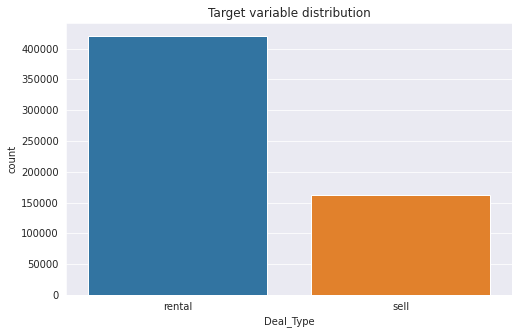

In [24]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.countplot(data['Deal_Type'])
plt.title('Target variable distribution')
plt.show()

In [25]:
data.shape

(582669, 22)

In [26]:
data.isnull().sum().sort_values(ascending = False)

NumApartments         563120
NumApartments1        563120
BuildingArea          525445
UsefulArea            477026
City                   47227
Description               23
ZipCode                    1
ID                         0
CoordN                     0
CoordE                     0
LivingSpace                0
Floor1                     0
Floor                      0
YearOfConstruction         0
DealType                   0
NumRooms                   0
LangDetected               0
PriceText                  0
AvailableDate              0
PublishedDate              0
Canton                     0
Deal_Type                  0
dtype: int64

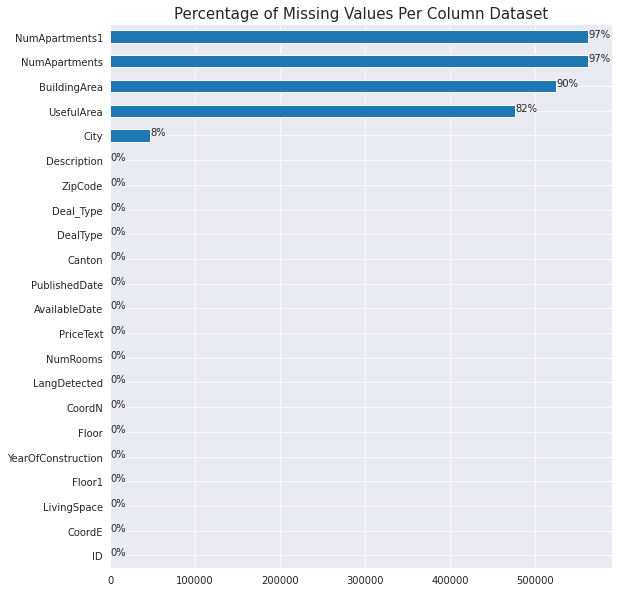

In [27]:
#Plot missing values in data
ax = data.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column Dataset', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/data.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [28]:
total = data.isnull().sum().sort_values(ascending=False)
percentage = ((data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100)
missing_data = pd.concat([total, percentage], axis=1, keys=['Total', 'Percentage'])
missing_data.head(20)

,Total,Percentage
NumApartments,563120,96.64492
NumApartments1,563120,96.64492
BuildingArea,525445,90.17899
UsefulArea,477026,81.86912
City,47227,8.10529
Description,23,0.00395
ZipCode,1,0.00017
ID,0,0.00000
CoordN,0,0.00000
CoordE,0,0.00000


## Treating Missing Values and Outliers

In [29]:
data.isnull().sum().sort_values(ascending=False)

NumApartments         563120
NumApartments1        563120
BuildingArea          525445
UsefulArea            477026
City                   47227
Description               23
ZipCode                    1
ID                         0
CoordN                     0
CoordE                     0
LivingSpace                0
Floor1                     0
Floor                      0
YearOfConstruction         0
DealType                   0
NumRooms                   0
LangDetected               0
PriceText                  0
AvailableDate              0
PublishedDate              0
Canton                     0
Deal_Type                  0
dtype: int64

In [30]:
mis_columns = ['NumApartments', 'NumApartments1', 'BuildingArea', 'UsefulArea' ]

In [31]:
data.corr()

,DealType,ZipCode,NumApartments,NumApartments1,CoordE,CoordN
DealType,1.00000,-0.06292,-0.16487,-0.16487,0.00941,-0.27611
ZipCode,-0.06292,1.00000,0.23040,0.23040,0.32383,0.22359
NumApartments,-0.16487,0.23040,1.00000,1.00000,0.22231,-0.03104
NumApartments1,-0.16487,0.23040,1.00000,1.00000,0.22231,-0.03104
CoordE,0.00941,0.32383,0.22231,0.22231,1.00000,-0.57470
CoordN,-0.27611,0.22359,-0.03104,-0.03104,-0.57470,1.00000


In [32]:
data['NumApartments'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: NumApartments, dtype: float64

In [33]:
data['NumApartments'].value_counts()

1.00000     3112
2.00000     2418
3.00000     1648
6.00000     1622
4.00000     1349
            ... 
93.00000       1
70.00000       1
65.00000       1
99.00000       1
38.00000       1
Name: NumApartments, Length: 74, dtype: int64

In [34]:
mis_columns

['NumApartments', 'NumApartments1', 'BuildingArea', 'UsefulArea']

In [35]:
NumApartments = data['NumApartments'].copy()
BuildingArea = data['BuildingArea'].copy()
UsefulArea = data['UsefulArea'].copy()

In [36]:
data.columns

Index(['ID', 'DealType', 'Canton', 'ZipCode', 'City', 'PublishedDate',
       'AvailableDate', 'PriceText', 'Description', 'LangDetected', 'NumRooms',
       'Floor', 'YearOfConstruction', 'NumApartments', 'Floor1',
       'NumApartments1', 'LivingSpace', 'BuildingArea', 'UsefulArea', 'CoordE',
       'CoordN', 'Deal_Type'],
      dtype='object')

In [37]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code

#sample_outliers = detect_outliers_zscore(data['adNumApartments.1'])
#print("Outliers from Z-scores method: ", sample_outliers)

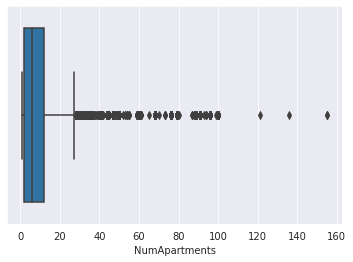

In [38]:
sns.boxplot(data['NumApartments'])
plt.show()

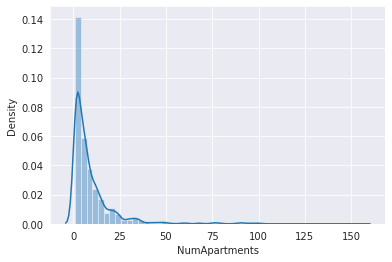

In [39]:
sns.distplot(data['NumApartments'])
plt.show()

In [40]:
data = data.drop(columns = mis_columns, axis = 1)

In [41]:
data.columns

Index(['ID', 'DealType', 'Canton', 'ZipCode', 'City', 'PublishedDate',
       'AvailableDate', 'PriceText', 'Description', 'LangDetected', 'NumRooms',
       'Floor', 'YearOfConstruction', 'Floor1', 'LivingSpace', 'CoordE',
       'CoordN', 'Deal_Type'],
      dtype='object')

In [42]:
data.isnull().sum().any()

True

In [43]:
data.isnull().sum().sort_values(ascending = False)

City                  47227
Description              23
ZipCode                   1
ID                        0
Floor                     0
CoordN                    0
CoordE                    0
LivingSpace               0
Floor1                    0
YearOfConstruction        0
LangDetected              0
NumRooms                  0
DealType                  0
PriceText                 0
AvailableDate             0
PublishedDate             0
Canton                    0
Deal_Type                 0
dtype: int64

In [44]:
data['City'].value_counts()

Zürich               36322
Lausanne             19709
Lugano               16873
Bern                 14397
Luzern               11527
                     ...  
Vouvry                   1
Saicourt                 1
Gresso                   1
Wiler bei Seedorf        1
Wilen b. Wollerau        1
Name: City, Length: 2148, dtype: int64

In [45]:
City = data['City'].copy()

In [46]:
data['City'].describe()

count     535442
unique      2148
top       Zürich
freq       36322
Name: City, dtype: object

In [47]:
data['City'].head()

0      Asuel
1     Zürich
2     Urdorf
3    Chiasso
4     Melano
Name: City, dtype: object

In [48]:
#Filling Null Values
data['City'].fillna('Zürich', inplace = True) #Fillna
#data['City'].ffill(axis = 0)  #ForwardFill

In [49]:
data['City'].mode()

0    Zürich
dtype: object

In [50]:
data.isnull().sum().sort_values(ascending = False)

Description           23
ZipCode                1
ID                     0
NumRooms               0
CoordN                 0
CoordE                 0
LivingSpace            0
Floor1                 0
YearOfConstruction     0
Floor                  0
LangDetected           0
DealType               0
PriceText              0
AvailableDate          0
PublishedDate          0
City                   0
Canton                 0
Deal_Type              0
dtype: int64

In [51]:
# ptype_encode = {}
# ptype_encode_values = range(16,0,-1)
# for i,k in zip(type_count.index,ptype_encode_values):
#     ptype_encode[i]=k
# ptype_encode

# data['adCity'] = data['adCity'].map(ptype_encode)

#### **Exploring the City copied from data['City']**

In [52]:
City.head()

0      Asuel
1     Zürich
2     Urdorf
3    Chiasso
4     Melano
Name: City, dtype: object

In [53]:
City = pd.DataFrame(data = City)
City.head()

,City
0,Asuel
1,Zürich
2,Urdorf
3,Chiasso
4,Melano


In [54]:
City.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582669 entries, 0 to 582668
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   City    535442 non-null  object
dtypes: object(1)
memory usage: 4.4+ MB


In [55]:
encoder=ce.TargetEncoder(cols='City')

In [56]:
data['City'].head()

0      Asuel
1     Zürich
2     Urdorf
3    Chiasso
4     Melano
Name: City, dtype: object

In [57]:
data['City'].head(20)

0                  Asuel
1                 Zürich
2                 Urdorf
3                Chiasso
4                 Melano
5              Novazzano
6                   Cugy
7                 Lugano
8               Neuenegg
9             Bellinzona
10                Zürich
11                Zürich
12             Steinmaur
13               Gunzwil
14                Zürich
15                Zürich
16    Gerra (Gambarogno)
17               Bottens
18                Zürich
19                Lugano
Name: City, dtype: object

In [58]:
data['City'].describe()

count     582669
unique      2148
top       Zürich
freq       83549
Name: City, dtype: object

In [59]:
data.describe(include = 'all')

,ID,DealType,Canton,ZipCode,City,PublishedDate,AvailableDate,PriceText,Description,LangDetected,NumRooms,Floor,YearOfConstruction,Floor1,LivingSpace,CoordE,CoordN,Deal_Type
count,582669,582669.00000,582669,582668.00000,582669,582669,582669,582669,582646,582669,582669,582669,582669,582669,582669,582669.00000,582669.00000,582669
unique,582669,NaN,7,NaN,2148,2135,700,9147,441161,4,100,56,520,56,1363,NaN,NaN,2
top,A1,NaN,ZH,NaN,Zürich,2021-08-13,nach Vereinbarung,On request,None,de,None,not available,not available,not available,not available,NaN,NaN,rental
freq,1,NaN,144098,NaN,83549,10281,234256,27155,15619,295370,109048,273739,369297,273739,201091,NaN,NaN,420408
mean,NaN,12.78479,NaN,4782.51585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.84939,46.80437,NaN
std,NaN,4.48251,NaN,2821.55953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.58816,0.67508,NaN
min,NaN,10.00000,NaN,1000.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,-141.54182,NaN
25%,NaN,10.00000,NaN,1800.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.05056,46.46260,NaN
50%,NaN,10.00000,NaN,4950.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.95761,46.83534,NaN
75%,NaN,20.00000,NaN,6987.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.65123,47.26299,NaN


In [60]:
#sns.scatterplot(x = data['City'], y = data['PriceText'])
#plt.show()

## Exploring the target Column

In [61]:
PriceText = data['PriceText'].copy()
PriceText = pd.DataFrame(data = PriceText)
PriceText.head()

,PriceText
0,"CHF 1,050"
1,"CHF 4,048"
2,"CHF 1,061"
3,"CHF 2,250"
4,"CHF 2,150,000"


In [62]:
data['PriceText'].head()

0        CHF 1,050
1        CHF 4,048
2        CHF 1,061
3        CHF 2,250
4    CHF 2,150,000
Name: PriceText, dtype: object

In [63]:
data['PriceText'] = data['PriceText'].replace(',','', regex = True)
data['PriceText'].head()

0       CHF 1050
1       CHF 4048
2       CHF 1061
3       CHF 2250
4    CHF 2150000
Name: PriceText, dtype: object

In [64]:
data['PriceText'] = data['PriceText'].replace('CHF','', regex = True)
data['PriceText'].head()

0        1050
1        4048
2        1061
3        2250
4     2150000
Name: PriceText, dtype: object

In [65]:
data['PriceText'].describe()

count         582669
unique          9147
top       On request
freq           27155
Name: PriceText, dtype: object

In [66]:
data['PriceText'].isnull().sum()

0

In [67]:
data['PriceText'].value_counts()

On request    27155
 1500          5943
 1200          5004
 1400          4784
 1300          4633
              ...  
EUR 867761        1
 11797            1
 4217             1
 7916             1
 6655             1
Name: PriceText, Length: 9147, dtype: int64

In [68]:
data['PriceText'] = data['PriceText'].replace('On request',np.nan)
data['PriceText'].value_counts()

 1500     5943
 1200     5004
 1400     4784
 1300     4633
 1600     4617
          ... 
 6717        1
 11575       1
 8895        1
 4785        1
 6655        1
Name: PriceText, Length: 9146, dtype: int64

In [69]:
data['PriceText'].isnull().sum()

27155

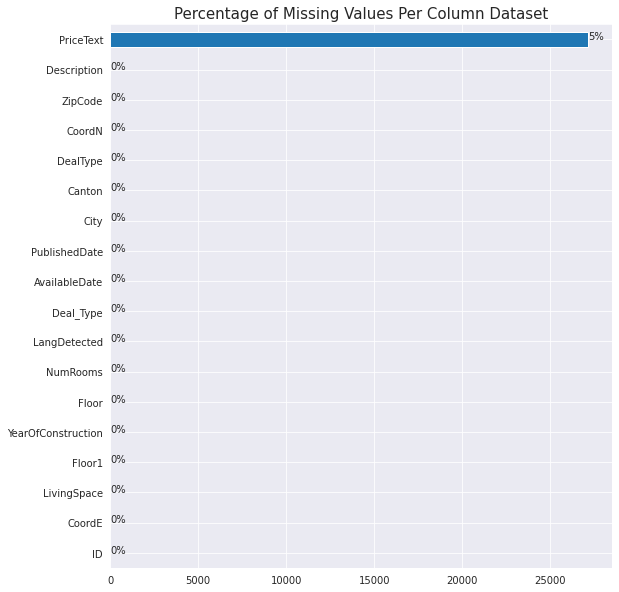

In [70]:
ax = data.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column Dataset', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/data.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [71]:
data['PriceText'] = data['PriceText'].replace('CHF','', regex = True)
data['PriceText'].head()

0        1050
1        4048
2        1061
3        2250
4     2150000
Name: PriceText, dtype: object

In [72]:
data['PriceText'].value_counts()

 1500     5943
 1200     5004
 1400     4784
 1300     4633
 1600     4617
          ... 
 6717        1
 11575       1
 8895        1
 4785        1
 6655        1
Name: PriceText, Length: 9146, dtype: int64

In [73]:
data['PriceText'] = data['PriceText'].replace('EUR','', regex = True)
data['PriceText'].head()

0        1050
1        4048
2        1061
3        2250
4     2150000
Name: PriceText, dtype: object

In [74]:
data['PriceText'].dtype

dtype('O')

In [75]:
data['PriceText'].value_counts()

 1500     5944
 1200     5005
 1400     4785
 1300     4633
 1600     4617
          ... 
 17762       1
 88042       1
 15605       1
 8964        1
 6655        1
Name: PriceText, Length: 9025, dtype: int64

In [76]:
data['PriceText'] = data['PriceText'].apply(pd.to_numeric)

In [77]:
data['PriceText'].dtype

dtype('float64')

In [78]:
data['PriceText'].describe()

count       555514.00000
mean        351492.21821
std        4209334.86779
min              1.00000
25%           1200.00000
50%           1800.00000
75%         310000.00000
max     1500000000.00000
Name: PriceText, dtype: float64

<AxesSubplot:xlabel='PriceText', ylabel='Density'>

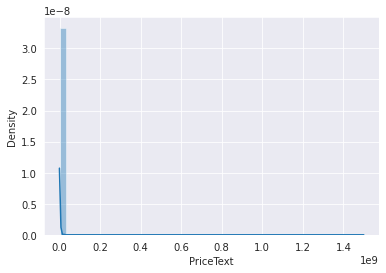

In [79]:
sns.distplot(data['PriceText'])

<AxesSubplot:xlabel='PriceText'>

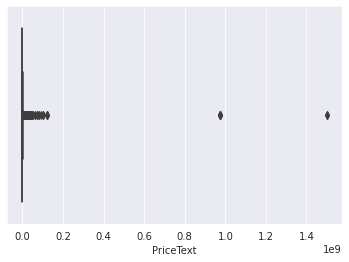

In [80]:
sns.boxplot(data['PriceText'])

In [81]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code

In [ ]:
sample_outliers = detect_outliers_zscore(data['PriceText'])
print("Outliers from Z-scores method: ", sample_outliers)

Since, PriceText contains outliers, drop the rows

In [83]:
data = data[data["PriceText"]<min(sample_outliers)].reset_index(drop = True)

In [84]:
data['PriceText'].describe()

count     555209.00000
mean      324747.62023
std       816841.63997
min            1.00000
25%         1200.00000
50%         1800.00000
75%       300000.00000
max     12923475.00000
Name: PriceText, dtype: float64

<AxesSubplot:xlabel='PriceText', ylabel='Density'>

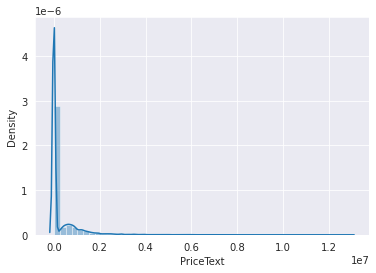

In [85]:
sns.distplot(data['PriceText'])

In [ ]:
sample_outliers = detect_outliers_zscore(data['PriceText'])
print("Outliers from Z-scores method: ", sample_outliers)

In [87]:
data = data[data["PriceText"]<min(sample_outliers)].reset_index(drop = True)

In [88]:
data["PriceText"].describe()

count    543999.00000
mean     238603.72275
std      494815.31277
min           1.00000
25%        1200.00000
50%        1780.00000
75%       79000.00000
max     2775000.00000
Name: PriceText, dtype: float64

<AxesSubplot:xlabel='PriceText'>

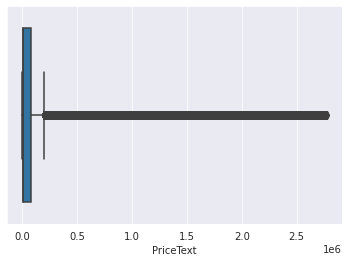

In [89]:
sns.boxplot(data['PriceText'])

Text(0.5, 0, 'Sample')

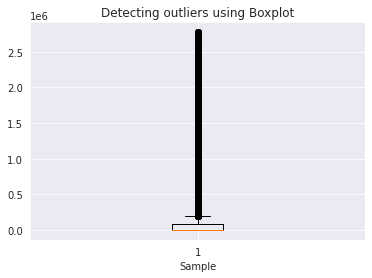

In [90]:
plt.boxplot(data["PriceText"])
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample')

<AxesSubplot:xlabel='PriceText', ylabel='Density'>

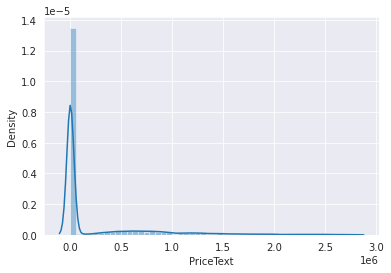

In [91]:
sns.distplot(data['PriceText'])

**Encoding the categorical column with **

In [92]:
City.shape, data['PriceText'].shape, data['City'].shape

((582669, 1), (543999,), (543999,))

In [93]:
City = data['City'].copy()

In [94]:
#Fit and Transform Train Data
encoder.fit_transform(City,data['PriceText'])

,City
0,357957.89474
1,84965.45703
2,57866.50332
3,176773.61957
4,738950.66667
...,...
543994,605980.28986
543995,196372.46840
543996,325490.47115
543997,241577.20000


In [95]:
data.isnull().sum()

ID                     0
DealType               0
Canton                 0
ZipCode                0
City                   0
PublishedDate          0
AvailableDate          0
PriceText              0
Description           22
LangDetected           0
NumRooms               0
Floor                  0
YearOfConstruction     0
Floor1                 0
LivingSpace            0
CoordE                 0
CoordN                 0
Deal_Type              0
dtype: int64

Dropping the description for now, Will work on it later

In [96]:
Description = data['Description'].copy()

In [97]:
data = data.drop('Description', axis = 1)

In [98]:
data.describe()

,DealType,ZipCode,PriceText,CoordE,CoordN
count,543999.00000,543999.00000,543999.00000,543999.00000,543999.00000
mean,12.54065,4803.23127,238603.72275,7.85618,46.81179
std,4.35335,2819.25695,494815.31277,2.66621,0.68566
min,10.00000,1000.00000,1.00000,0.00000,-141.54182
25%,10.00000,1802.00000,1200.00000,7.05704,46.46967
50%,10.00000,6003.00000,1780.00000,7.98149,46.86528
75%,20.00000,6992.00000,79000.00000,8.64974,47.26765
max,20.00000,8967.00000,2775000.00000,1078.51760,47.69496


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543999 entries, 0 to 543998
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  543999 non-null  object 
 1   DealType            543999 non-null  int64  
 2   Canton              543999 non-null  object 
 3   ZipCode             543999 non-null  float64
 4   City                543999 non-null  object 
 5   PublishedDate       543999 non-null  object 
 6   AvailableDate       543999 non-null  object 
 7   PriceText           543999 non-null  float64
 8   LangDetected        543999 non-null  object 
 9   NumRooms            543999 non-null  object 
 10  Floor               543999 non-null  object 
 11  YearOfConstruction  543999 non-null  object 
 12  Floor1              543999 non-null  object 
 13  LivingSpace         543999 non-null  object 
 14  CoordE              543999 non-null  float64
 15  CoordN              543999 non-nul

In [100]:
data.columns

Index(['ID', 'DealType', 'Canton', 'ZipCode', 'City', 'PublishedDate',
       'AvailableDate', 'PriceText', 'LangDetected', 'NumRooms', 'Floor',
       'YearOfConstruction', 'Floor1', 'LivingSpace', 'CoordE', 'CoordN',
       'Deal_Type'],
      dtype='object')

In [101]:
data.shape

(543999, 17)

### Canton

In [102]:
data['Canton'].head()

0    JU
1    ZH
2    ZH
3    TI
4    TI
Name: Canton, dtype: object

In [129]:
data['Canton'].value_counts()

ZH    136333
VD    121857
BE     96826
TI     96795
FR     42471
LU     39679
JU     10038
Name: Canton, dtype: int64

Run it at the later end because it will add to the number of columns and there is still plenty of work to do

In [104]:
#data = pd.get_dummies(data = data['Canton'], drop_first = True)

### ZipCode

In [105]:
data.ZipCode.head()

0   2954.00000
1   8053.00000
2   8902.00000
3   6830.00000
4   6818.00000
Name: ZipCode, dtype: float64

In [106]:
data.ZipCode.value_counts()

6900.00000    19108
1700.00000     7260
8400.00000     4989
1630.00000     4375
1004.00000     4244
              ...  
6904.00000        1
3003.00000        1
4543.00000        1
8522.00000        1
1313.00000        1
Name: ZipCode, Length: 1721, dtype: int64

Is this column really relevant to the model????

In [107]:
data.columns

Index(['ID', 'DealType', 'Canton', 'ZipCode', 'City', 'PublishedDate',
       'AvailableDate', 'PriceText', 'LangDetected', 'NumRooms', 'Floor',
       'YearOfConstruction', 'Floor1', 'LivingSpace', 'CoordE', 'CoordN',
       'Deal_Type'],
      dtype='object')

## Date_Columns

In [108]:
date_col = ['PublishedDate', 'AvailableDate']

In [109]:
data[date_col].head()

,PublishedDate,AvailableDate
0,2020-12-16,not available
1,2020-11-19,nach Vereinbarung
2,2021-01-20,sofort
3,2020-10-16,sofort
4,2020-07-17,sofort


In [110]:
data['AvailableDate'].value_counts()

nach Vereinbarung    215027
sofort                83407
By arrangement        57508
Immediately           18634
not available         17195
                      ...  
01.06.2026                1
01.11.2026                1
14.06.2022                1
01.05.2045                1
23.04.2022                1
Name: AvailableDate, Length: 692, dtype: int64

In [111]:
data['AvailableDate'].head()

0        not available
1    nach Vereinbarung
2               sofort
3               sofort
4               sofort
Name: AvailableDate, dtype: object

In [112]:
#sofort = 'right away'
#nach Vereinbarung = by arrangement

In [113]:
data['PublishedDate'].head()

0    2020-12-16
1    2020-11-19
2    2021-01-20
3    2020-10-16
4    2020-07-17
Name: PublishedDate, dtype: object

In [114]:
data.columns

Index(['ID', 'DealType', 'Canton', 'ZipCode', 'City', 'PublishedDate',
       'AvailableDate', 'PriceText', 'LangDetected', 'NumRooms', 'Floor',
       'YearOfConstruction', 'Floor1', 'LivingSpace', 'CoordE', 'CoordN',
       'Deal_Type'],
      dtype='object')

In [115]:
data['Description'] = Description.copy()

In [116]:
data[['PublishedDate', 'AvailableDate', 'Deal_Type', 'PriceText', 'Description']].head()

,PublishedDate,AvailableDate,Deal_Type,PriceText,Description
0,2020-12-16,not available,rental,1050.00000,Appartement avec beaucoup de charme à louer à ...
1,2020-11-19,nach Vereinbarung,rental,4048.00000,Die Highlights:<br />» Gut geschnittener Büror...
2,2021-01-20,sofort,rental,1061.00000,Für diese Wohnung suchen wir ein nettes Paar (...
3,2020-10-16,sofort,rental,2250.00000,<h3>Chiasso</h3><p><p>Si affitta in pieno a ce...
4,2020-07-17,sofort,sell,2150000.00000,"Attico mansardato, posto in elegante palazzina..."


In [117]:
data['PublishedDate'].head()

0    2020-12-16
1    2020-11-19
2    2021-01-20
3    2020-10-16
4    2020-07-17
Name: PublishedDate, dtype: object

In [119]:
AvlDate = data['AvailableDate'].copy()
PubDate = data['PublishedDate'].copy()

In [127]:
#AvlDate = pd.to_datetime(AvlDate)
AvlDate

0             not available
1         nach Vereinbarung
2                    sofort
3                    sofort
4                    sofort
                ...        
543994          Immediately
543995       By arrangement
543996       By arrangement
543997       By arrangement
543998           01.04.2022
Name: AvailableDate, Length: 543999, dtype: object

In [128]:
AvlDate.value_counts()

nach Vereinbarung    215027
sofort                83407
By arrangement        57508
Immediately           18634
not available         17195
                      ...  
01.06.2026                1
01.11.2026                1
14.06.2022                1
01.05.2045                1
23.04.2022                1
Name: AvailableDate, Length: 692, dtype: int64

In [133]:
replacement_mapping_dict = {
    "nach Vereinbarung": np.nan,
    "sofort": np.nan,
    "By arrangement": np.nan,
    "Immediately": np.nan,
    "not available": np.nan
}
AvlDate = AvlDate.replace(replacement_mapping_dict)

In [134]:
AvlDate.value_counts()

01.04.2021    12869
01.07.2021    12218
01.10.2021    11516
01.05.2021     8766
01.08.2021     8735
              ...  
18.07.2022        1
17.07.5392        1
01.01.2034        1
01.06.2026        1
23.04.2022        1
Name: AvailableDate, Length: 687, dtype: int64

In [136]:
len(data)

543999

In [138]:
(AvlDate.isnull().sum()/len(data))*100

72.01686032511088

In [ ]:
AvlDate.fillna("Others", inplace = True)

### Pend Pend Pend Pend

## We Move to other columns again******

In [139]:
data.columns

Index(['ID', 'DealType', 'Canton', 'ZipCode', 'City', 'PublishedDate',
       'AvailableDate', 'PriceText', 'LangDetected', 'NumRooms', 'Floor',
       'YearOfConstruction', 'Floor1', 'LivingSpace', 'CoordE', 'CoordN',
       'Deal_Type', 'Description'],
      dtype='object')

In [140]:
data['NumRooms'].head()

0     3.5
1    None
2       3
3      10
4     5.5
Name: NumRooms, dtype: object

In [151]:
def percentage_missing(df):    
    pm = (df.isnull().sum()/len(data))*100
    return pm

In [143]:
(data.NumRooms.isnull().sum()/len(data))*100

0.0

In [152]:
percentage_missing(data['NumRooms'])

0.0

## Things to try out

* **data = data.sort_values(by=['adPublishedDate']).reset_index(drop=True)**
* Trying to sort the data by dates... 'adPublishedDate', 'adAvailableDate'
* How many days is between the published date and available date
* Extract days and month from the date columns

In [118]:
#Remember this for some visualization
#count_plot = sns.catplot(x="adNumApartments.1", kind="count" ,data=data, hue="DealType")
#plt.hist(data['adNumApartments.1'])
#plt.show()